**Visualisation in R**

Visualisation was done using ggplot2 library. 
The main task of this program is to answer visually on the following questions."

**Source of the data:**
https://apli.bizkaia.eus/apps/seguru/el23/es


Importing and installing necessary libraries

In [ ]:
install.packages("treemapify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘Rcpp’, ‘png’, ‘jpeg’, ‘shades’, ‘gridtext’, ‘ggfittext’




In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(treemapify)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Reading the data from CSV file and showing the sample 10 rows from the beginning

In [ ]:
general_data = read.csv('/content/Foral_Bizkaia_General_2023.csv')
head(general_data, 10)

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BIZKAIA,VOTES,900435,100,204557,1675,132955,38756,1826,538,43893,84656,2896,10636,10152,8338,359557
2,BIZKAIA,PERCENTAGE,900435,100,38,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301
4,BILBAO,PERCENTAGE,267249,100,36,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,BUSTURIA,VOTES,230852,100,59931,0,43040,8142,0,0,13010,13298,908,2405,2905,2148,85065
6,BUSTURIA,PERCENTAGE,230852,100,41,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,DURANGO,VOTES,170661,100,41128,0,34057,7267,0,538,5397,14365,655,0,1975,1866,63413
8,DURANGO,PERCENTAGE,170661,100,39,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,ENKARTERRIAK,VOTES,231673,100,48955,498,27876,10871,1826,0,7265,32076,497,3034,2510,2487,93778


The parties are as follows: **'EAJ.PNV',	'EB.AZ',	'EH.BILDU',	'ELKARREKIN.POD.',	'ENK.EXI',	'PH	PP',	'PSE.EE', 'STOP',	VOX'**

Deleting the duplicates of the data

In [ ]:
general_data = distinct(general_data)

**Manipullating the data in order to be able to visualisate them correctly**

Creating the new column, which is showing the real number of votes, because some people were absent

In [ ]:
general_data = general_data %>% mutate(TRUE_VOTERS = CENSUS - ABSENT)
head(general_data, 5)

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BIZKAIA,VOTES,900435,100,204557,1675,132955,38756,1826,538,43893,84656,2896,10636,10152,8338,359557,540878
2,BIZKAIA,PERCENTAGE,900435,100,38,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948
4,BILBAO,PERCENTAGE,267249,100,36,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,BUSTURIA,VOTES,230852,100,59931,0,43040,8142,0,0,13010,13298,908,2405,2905,2148,85065,145787


Showing only the data containing the numbers of votes, where concept is equal to votes

In [ ]:
votes = general_data %>% filter(CONCEPT == 'VOTES')
head(votes, 5)

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BIZKAIA,VOTES,900435,100,204557,1675,132955,38756,1826,538,43893,84656,2896,10636,10152,8338,359557,540878
2,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948
3,BUSTURIA,VOTES,230852,100,59931,0,43040,8142,0,0,13010,13298,908,2405,2905,2148,85065,145787
4,DURANGO,VOTES,170661,100,41128,0,34057,7267,0,538,5397,14365,655,0,1975,1866,63413,107248
5,ENKARTERRIAK,VOTES,231673,100,48955,498,27876,10871,1826,0,7265,32076,497,3034,2510,2487,93778,137895


Showing the data only containing percentage values, where concept is equal to percentage

In [ ]:
percent_votes = general_data %>% filter(CONCEPT == 'PERCENTAGE')
head(percent_votes, 5)

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BIZKAIA,PERCENTAGE,900435,100,38,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,BILBAO,PERCENTAGE,267249,100,36,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,BUSTURIA,PERCENTAGE,230852,100,41,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,DURANGO,PERCENTAGE,170661,100,39,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ENKARTERRIAK,PERCENTAGE,231673,100,36,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Task 1 What is the percentage of vote distribution of all the parties in Bizkaia?**

I create the new variable, which stores the votes distribution in percentage and then change the format using pivot_longer

In [ ]:
bizkaia_data = votes %>% filter(AREA == 'BIZKAIA') %>% select(c(TRUE_VOTERS, EAJ.PNV:VOX))

percentage_votes = round(bizkaia_data[, -1] / bizkaia_data$TRUE_VOTERS*100)
percentage_votes = cbind(bizkaia_data$TRUE_VOTERS, percentage_votes)
colnames(percentage_votes) = c("TRUE_VOTERS", colnames(bizkaia_data[, -1]))

head(percentage_votes)

,TRUE_VOTERS,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540878,38,0,25,7,0,0,8,16,1,2


In [ ]:
votes_distribution = pivot_longer(percentage_votes, cols = -TRUE_VOTERS, names_to = "PARTY", values_to = "PERCENTAGE_VOTES") %>% select(c('PARTY', 'PERCENTAGE_VOTES')) %>% arrange(desc(PERCENTAGE_VOTES))
votes_distribution

PARTY,PERCENTAGE_VOTES
<chr>,<dbl>
EAJ.PNV,38
EH.BILDU,25
PSE.EE,16
PP,8
ELKARREKIN.POD.,7
VOX,2
STOP,1
EB.AZ,0
ENK.EXI,0


Then I created two plots:
1. Pie chart
2. Treemap

Both of these plots show really well the percantage distribution for each party in Bizakaia. Additionally I add values in percentage and change colors in order to obtain more visually clear graphs

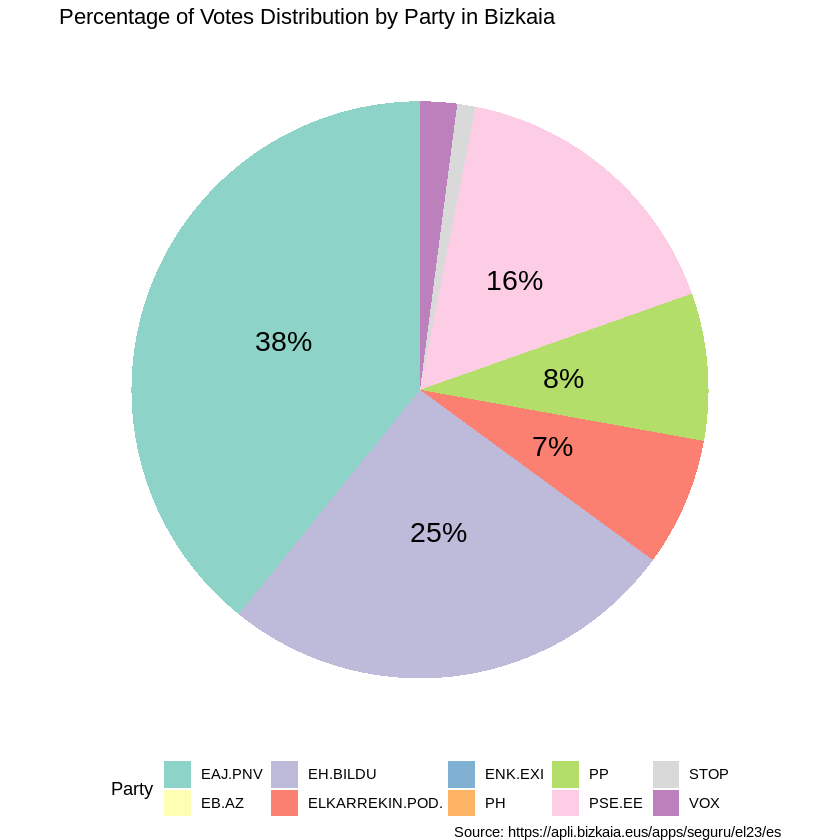

In [ ]:
#visualisation 1 pie chart

ggplot(votes_distribution, aes(x = "", y = PERCENTAGE_VOTES, fill = PARTY)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = ifelse(PERCENTAGE_VOTES > 2, paste0(round(PERCENTAGE_VOTES), "%"), "")),
            position = position_stack(vjust = 0.5),
            size = 6, color = "black") +
  scale_fill_brewer(palette = "Set3") +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of Votes Distribution by Party in Bizkaia",
       fill = "Party",
       y = NULL,
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_void() +
  theme(legend.position = "bottom")

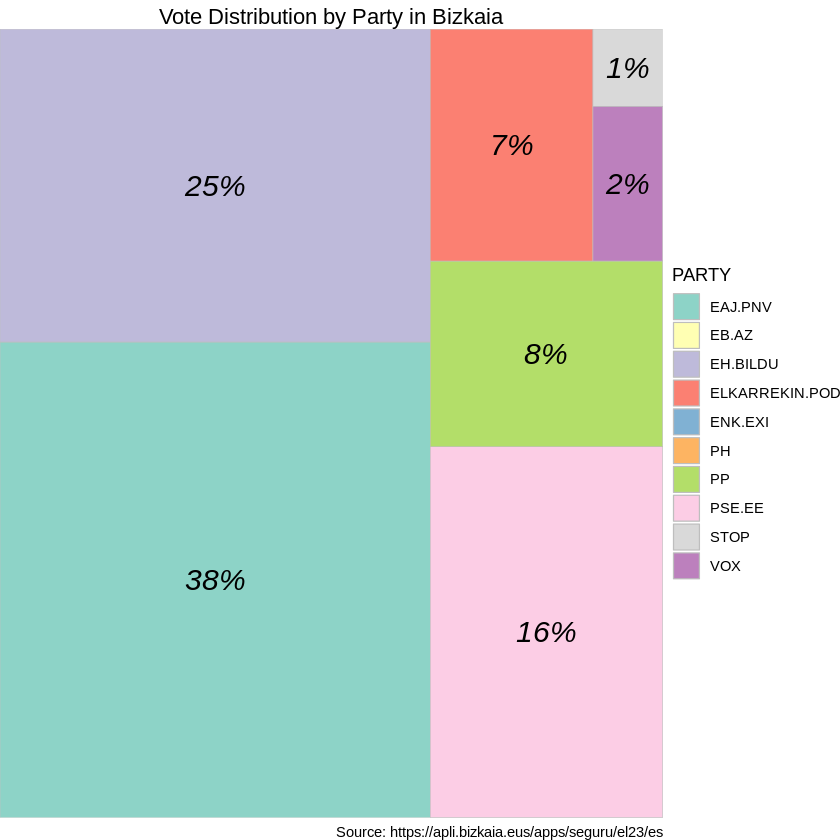

In [ ]:
#visualisation 2 treemap

ggplot(votes_distribution, aes(area = PERCENTAGE_VOTES, group = PARTY, fill = PARTY, label = paste0(round(PERCENTAGE_VOTES, 1), "%"))) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "black", place = "centre") +
  scale_fill_brewer(palette = "Set3") +  # Change colors using a Brewer palette
  labs(title = "Vote Distribution by Party in Bizkaia", caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5))



As we can see both plots gave as the same results, whcih are as follows:


---


EAJ.PNV -	38%
EH.BILDU -	25%
PSE.EE - 16%
PP - 8%
ELKARREKIN.POD. -	7%
VOX	- 2%
STOP -	1%
EB.AZ	- 0%
ENK.EXI -	0%
PH	- 0%


**Task 2 Which 5 parties are most famous in 20 most populated areas in Bizkaia?**

Firstly, I chose the 20 most populated areas

In [ ]:
most_populated_areas = votes %>% filter(AREA != "BIZKAIA") %>% arrange(desc(CENSUS)) %>% head(20)
most_populated_areas

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948
2,ENKARTERRIAK,VOTES,231673,100,48955,498,27876,10871,1826,0,7265,32076,497,3034,2510,2487,93778,137895
3,BUSTURIA,VOTES,230852,100,59931,0,43040,8142,0,0,13010,13298,908,2405,2905,2148,85065,145787
4,DURANGO,VOTES,170661,100,41128,0,34057,7267,0,538,5397,14365,655,0,1975,1866,63413,107248
5,BARAKALDO,VOTES,77950,100,15096,179,7103,4003,193,0,3214,10792,216,1345,741,663,34405,43545
6,GETXO,VOTES,60731,100,13315,0,7103,2161,0,0,8205,4259,305,1333,749,382,22919,37812
7,SANTURTZI,VOTES,36969,100,7040,71,5321,1722,54,0,1272,4696,55,487,372,329,15550,21419
8,PORTUGALETE,VOTES,36362,100,5929,64,3431,1562,68,0,1479,7523,56,448,354,308,15140,21222
9,BASAURI,VOTES,32426,100,6929,0,3484,1429,0,131,1387,4072,65,0,291,283,14355,18071


Then for each of the area, I took the number of votes for each party and created the pivot table with the results

In [ ]:
top_five_parties = most_populated_areas %>%
  select(AREA, EAJ.PNV:VOX) %>%
  pivot_longer(cols = EAJ.PNV:VOX, names_to = "PARTY", values_to = "VOTES") %>%
  group_by(AREA) %>%
  slice_max(order_by = VOTES, n = 5) %>%
  ungroup()

head(top_five_parties, 5)

AREA,PARTY,VOTES
<chr>,<chr>,<int>
AMOREBIETA,EAJ.PNV,4081
AMOREBIETA,EH.BILDU,3361
AMOREBIETA,PSE.EE,882
AMOREBIETA,ELKARREKIN.POD.,543
AMOREBIETA,PP,209


Then I change number of votes into percentage, in order to have more general results, which are easier to compare between areas

In [ ]:
top_five_parties = top_five_parties %>%
  group_by(AREA) %>%
  mutate(VOTES_PERC = VOTES / sum(VOTES)*100)

head(top_five_parties, 5)

AREA,PARTY,VOTES,VOTES_PERC
<chr>,<chr>,<int>,<dbl>
AMOREBIETA,EAJ.PNV,4081,44.964742
AMOREBIETA,EH.BILDU,3361,37.031732
AMOREBIETA,PSE.EE,882,9.717937
AMOREBIETA,ELKARREKIN.POD.,543,5.982812
AMOREBIETA,PP,209,2.302777


Then  I create two charts:
1. Stacked bar chart
2. Radar chart

In my opinion, stack bar chart is perfect for showing such comparision. The colors are really clear and we can pretty easly compare each of the region. With radar chart I had bigger problems, since it is not perfect for this type of task, but I really wanted to created other. It is also quite clear but definitely worst the stacked bar chart.

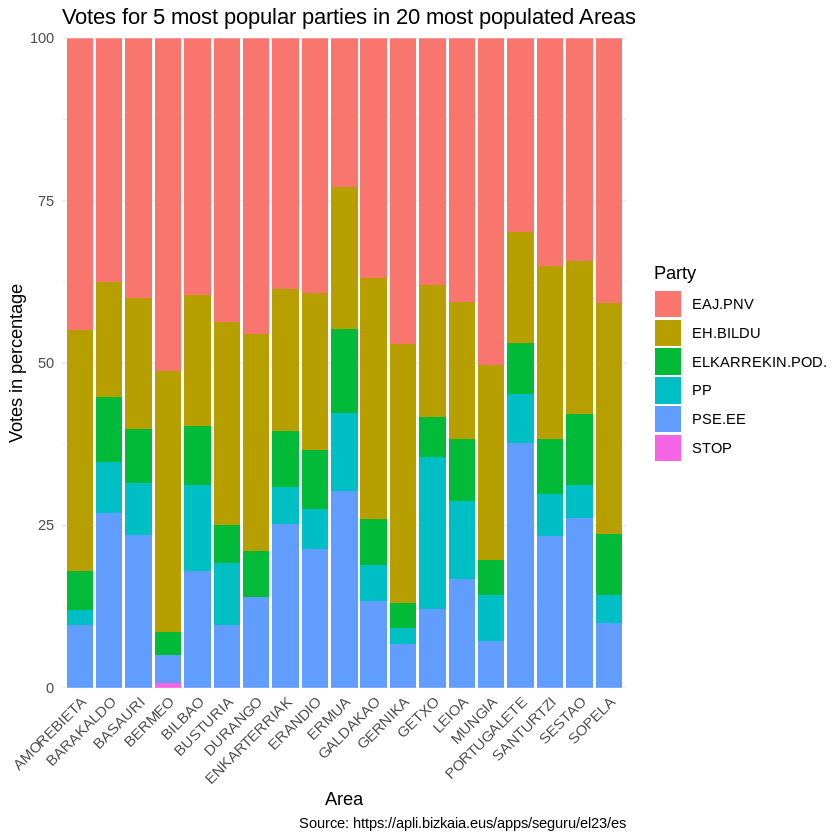

In [ ]:
#visualisation 1 stacked bar chart

ggplot(top_five_parties, aes(x = AREA, y = VOTES_PERC, fill = PARTY)) +
  geom_bar(stat = "identity") +
  labs(title = "Votes for 5 most popular parties in 20 most populated Areas",
       x = "Area",
       y = "Votes in percentage",
       fill = "Party",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::comma, expand = c(0, 0))

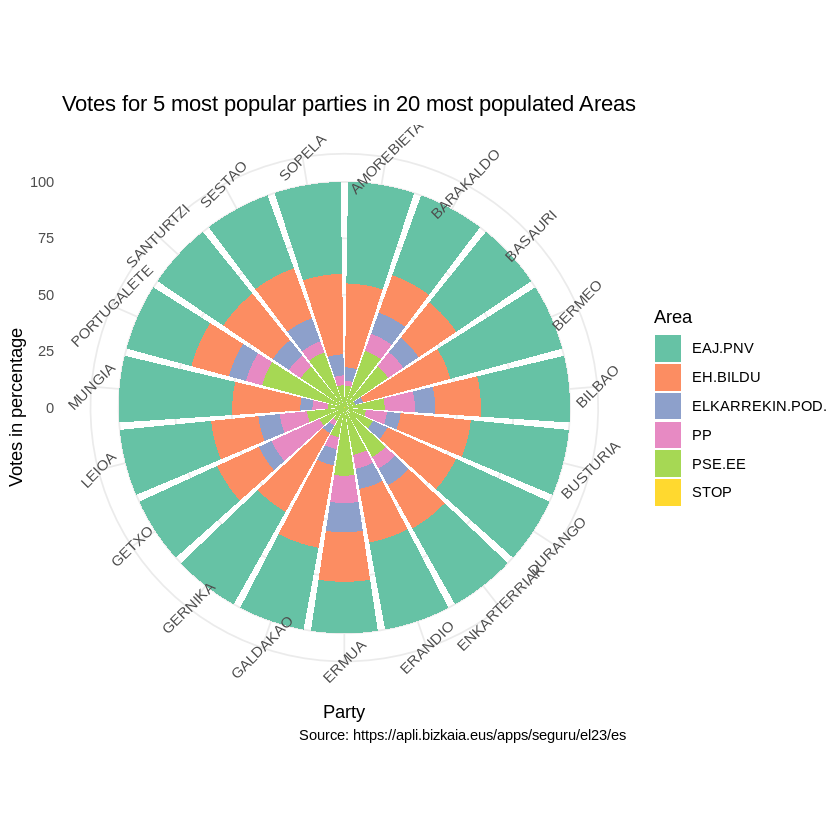

In [ ]:
#visualisation 2 radar chart

ggplot(top_five_parties, aes(x = AREA, y = VOTES_PERC, fill = PARTY)) +
  geom_bar(stat = "identity") +
  labs(title = "Votes for 5 most popular parties in 20 most populated Areas",
       x = "Party",
       y = "Votes in percentage",
       fill = "Area",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::comma, expand = c(0, 0)) +
  coord_polar() +
  scale_fill_brewer(palette = "Set2")


In general, we can see on both charts above, that almost for every region the similar parties are the same with really close percentage results. The only region which votes for someone different is Bermeo, which voted on STOP party.

**Task 3 Which 10 areas have the biggest number of voters in Bizkaia?**

Create the variables for 10 areas with the biggest number of voters in Bizakaia

In [ ]:
most_voters = votes %>% filter(AREA != "BIZKAIA") %>% mutate(TRUE_VOTERS = CENSUS - ABSENT) %>% arrange(desc(TRUE_VOTERS)) %>% head(10)
most_voters

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948
2,BUSTURIA,VOTES,230852,100,59931,0,43040,8142,0,0,13010,13298,908,2405,2905,2148,85065,145787
3,ENKARTERRIAK,VOTES,231673,100,48955,498,27876,10871,1826,0,7265,32076,497,3034,2510,2487,93778,137895
4,DURANGO,VOTES,170661,100,41128,0,34057,7267,0,538,5397,14365,655,0,1975,1866,63413,107248
5,BARAKALDO,VOTES,77950,100,15096,179,7103,4003,193,0,3214,10792,216,1345,741,663,34405,43545
6,GETXO,VOTES,60731,100,13315,0,7103,2161,0,0,8205,4259,305,1333,749,382,22919,37812
7,SANTURTZI,VOTES,36969,100,7040,71,5321,1722,54,0,1272,4696,55,487,372,329,15550,21419
8,PORTUGALETE,VOTES,36362,100,5929,64,3431,1562,68,0,1479,7523,56,448,354,308,15140,21222
9,BASAURI,VOTES,32426,100,6929,0,3484,1429,0,131,1387,4072,65,0,291,283,14355,18071


Creating two visualisation:
1. Bar chart
2. Horizontal lollipop plot

Here I created two really basic plot, additionally I added the gradient filling, which fills accordingly to the number of votes.

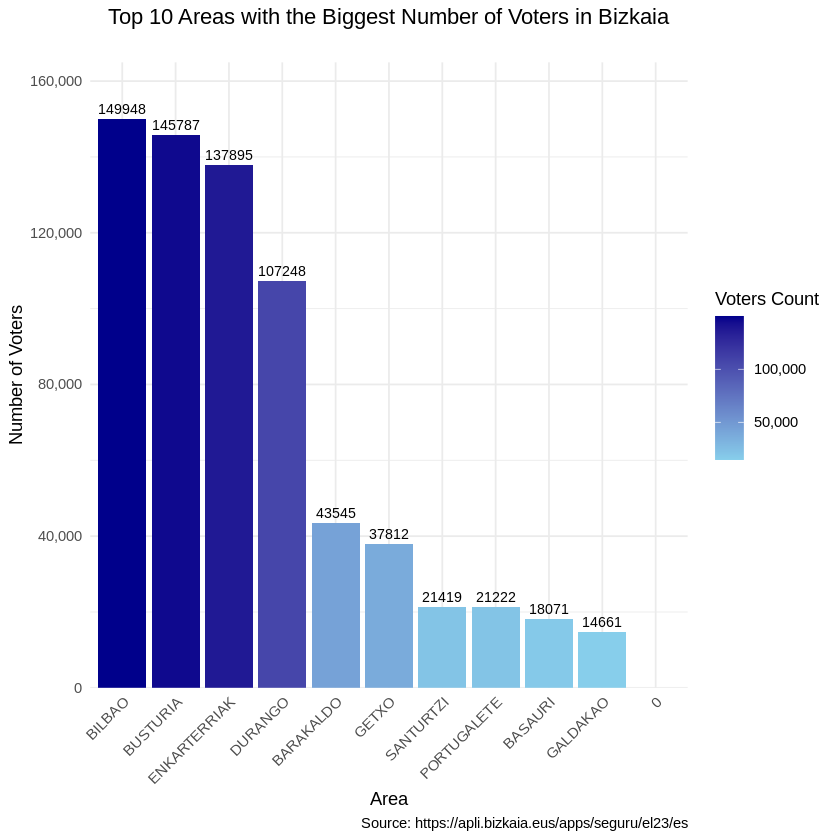

In [ ]:
#visualisation bar chart

ggplot(most_voters, aes(x = reorder(AREA, -TRUE_VOTERS), y = TRUE_VOTERS, fill = TRUE_VOTERS)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = TRUE_VOTERS), vjust = -0.5, color = "black", size = 3) +
  labs(title = "Top 10 Areas with the Biggest Number of Voters in Bizkaia",
       x = "Area",
       y = "Number of Voters",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  scale_fill_gradient(name = 'Voters Count', low = "skyblue", high = "darkblue", label = scales::comma) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5, margin = margin(0, 0, 20, 0))) +
  scale_y_continuous(labels = scales::comma, expand = c(0, 0)) +
  expand_limits(x = c(0, max(most_voters$AREA)), y = c(0, max(most_voters$TRUE_VOTERS) * 1.1))

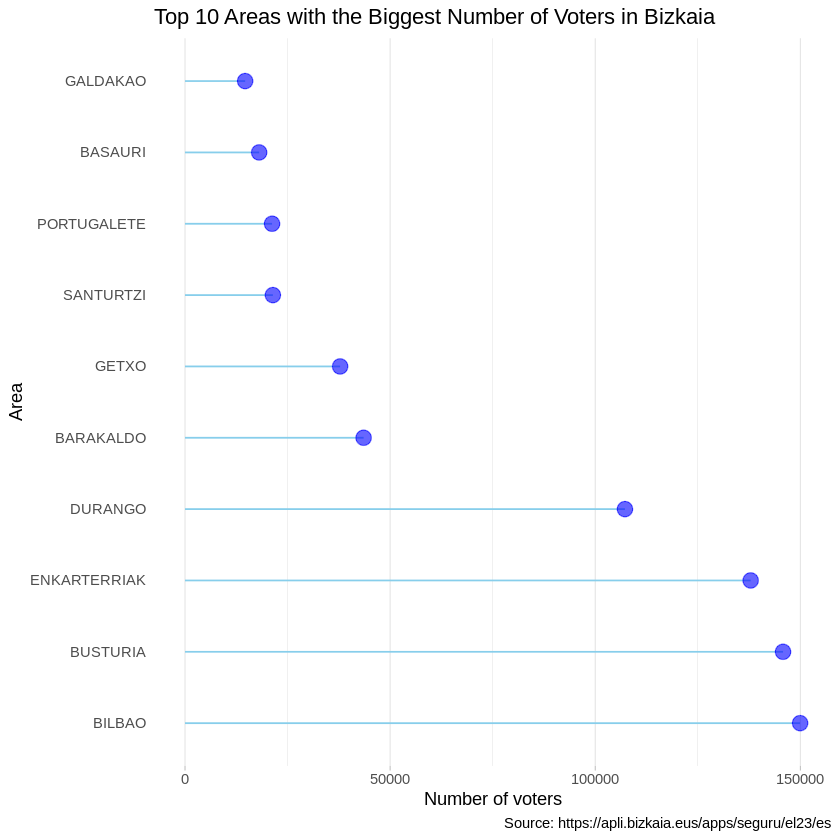

In [ ]:
#visualisation lollipop plot

ggplot(most_voters, aes(x=reorder(AREA, -TRUE_VOTERS), y=TRUE_VOTERS)) +
  geom_segment( aes(x=reorder(AREA, -TRUE_VOTERS), xend=reorder(AREA, -TRUE_VOTERS), y=0, yend=TRUE_VOTERS), color="skyblue") +
  geom_point( color="blue", size=4, alpha=0.6) +
  theme_light() +
  labs(title = "Top 10 Areas with the Biggest Number of Voters in Bizkaia",
       x = "Area",
       y = "Number of voters",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  )


**Task 4 Which 10 areas have the largest percentage of absences in Bizkaia?**

Calculating, which 10 areas has the largest percentage of absences by divided the ABSENT column over CENSUS

In [ ]:
absences_in_percent = votes %>% filter(AREA != "BIZKAIA") %>% mutate(ABSENCE_PERC = ABSENT/CENSUS *100) %>% arrange(desc(ABSENCE_PERC)) %>% head(10)
absences_in_percent

,AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS,ABSENCE_PERC
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,BASAURI,VOTES,32426,100,6929,0,3484,1429,0,131,1387,4072,65,0,291,283,14355,18071,44.27003
2,BARAKALDO,VOTES,77950,100,15096,179,7103,4003,193,0,3214,10792,216,1345,741,663,34405,43545,44.13727
3,BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948,43.89203
4,ERANDIO,VOTES,18995,100,3958,0,2439,912,0,0,622,2162,89,172,246,215,8180,10815,43.06396
5,SESTAO,VOTES,21048,100,3837,44,2634,1215,37,0,583,2916,29,278,218,233,9024,12024,42.87343
6,LEIOA,VOTES,25314,100,5525,0,2858,1288,0,0,1640,2273,66,311,298,230,10825,14489,42.76290
7,SANTURTZI,VOTES,36969,100,7040,71,5321,1722,54,0,1272,4696,55,487,372,329,15550,21419,42.06227
8,PORTUGALETE,VOTES,36362,100,5929,64,3431,1562,68,0,1479,7523,56,448,354,308,15140,21222,41.63687
9,SOPELA,VOTES,11362,100,2565,0,2244,589,0,0,274,629,72,72,156,104,4657,6705,40.98750


Then I create the two visualisations:
1. Horizontal bar plot
2. Dot plot

Both of these chart are showing really good, the percentage of absences in each region even there are really basics. Additionally I added into Dot plot the scaling factor depending on the values, if the absence is bigger, then the dot is bigger too.

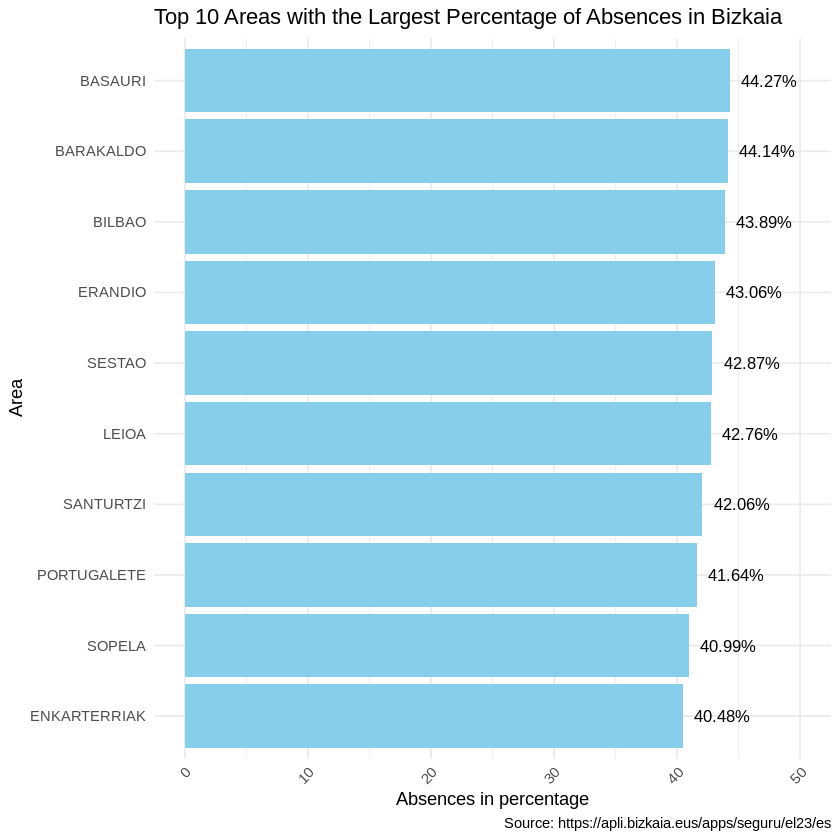

In [ ]:
# visualisation hotizontal bar plot

ggplot(absences_in_percent, aes(x = ABSENCE_PERC, y = reorder(AREA, ABSENCE_PERC))) +
  geom_bar(,stat = "identity", fill = "skyblue") +
  geom_text(aes(label = paste0(round(ABSENCE_PERC, 2), "%")), vjust = 0.5, hjust =-0.2, size = 3.5, color = "black") +
  labs(title = "Top 10 Areas with the Largest Percentage of Absences in Bizkaia",
       x = "Absences in percentage",
       y = "Area",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlim(0, 50) +
  expand_limits(x = 0)


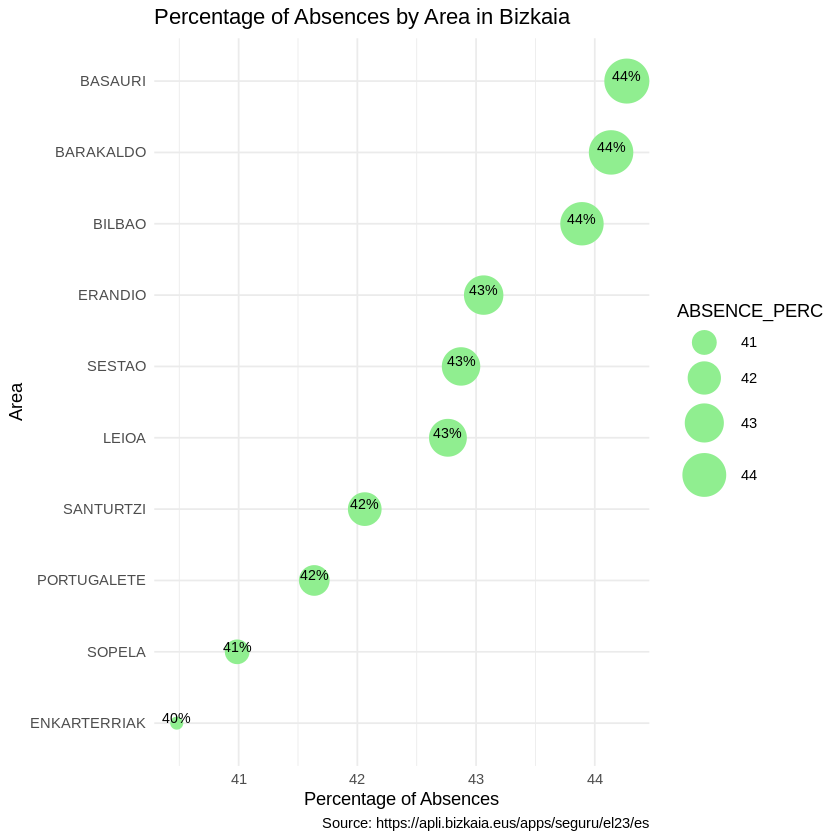

In [ ]:
#visualisation dotplot

ggplot(absences_in_percent, aes(x = ABSENCE_PERC, y = reorder(AREA, ABSENCE_PERC), size = ABSENCE_PERC)) +
  geom_point(color = "lightgreen") +
  geom_text(aes(label = paste0(round(ABSENCE_PERC), "%")),
            hjust = 0.5, vjust = 0, size = 3, color = "black") +
  labs(title = "Percentage of Absences by Area in Bizkaia",
       x = "Percentage of Absences",
       y = "Area",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  scale_size_continuous(range = c(3, 12)) +
  theme_minimal()

As we can see, the absences are really similar, the dfferences are quite small. The biggest absence was in Basuari with 44.27% and the smallest in Errkanteriak 40.48%. Which gaves us only about 4% difference.

**Task 5 What are the five most famous parties in Bilbao and in Bizkaia?**

Firstly, I created the two different variables for Bilbao i Bizakaia. Then using pivot table takes the number of votes for each party and choose the five most popular. And calculate votes in percentage in order to comparision be more clear.

In [ ]:
bilbao = votes %>% filter(AREA == 'BILBAO')
bilbao

AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BILBAO,VOTES,267249,100,54543,1177,27982,12476,0,0,18221,24917,836,5197,2762,1837,117301,149948


In [ ]:
bilbao_most_popular = pivot_longer(bilbao, cols = EAJ.PNV:VOX, names_to = "PARTY", values_to = "VOTES", names_repair = "unique")

In [ ]:
top_five_parties_bilbao = bilbao_most_popular %>% mutate(VOTES_IN_PERCENTAGE = round(VOTES/TRUE_VOTERS*100)) %>% arrange(desc(VOTES_IN_PERCENTAGE)) %>% head(5)
top_five_parties_bilbao

AREA,CONCEPT,CENSUS,VERIFIED,BLANK,NULL.,ABSENT,TRUE_VOTERS,PARTY,VOTES,VOTES_IN_PERCENTAGE
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
BILBAO,VOTES,267249,100,2762,1837,117301,149948,EAJ.PNV,54543,36
BILBAO,VOTES,267249,100,2762,1837,117301,149948,EH.BILDU,27982,19
BILBAO,VOTES,267249,100,2762,1837,117301,149948,PSE.EE,24917,17
BILBAO,VOTES,267249,100,2762,1837,117301,149948,PP,18221,12
BILBAO,VOTES,267249,100,2762,1837,117301,149948,ELKARREKIN.POD.,12476,8


In [ ]:
bizkaia = votes %>% filter(AREA == 'BIZKAIA')
bizkaia

AREA,CONCEPT,CENSUS,VERIFIED,EAJ.PNV,EB.AZ,EH.BILDU,ELKARREKIN.POD.,ENK.EXI,PH,PP,PSE.EE,STOP,VOX,BLANK,NULL.,ABSENT,TRUE_VOTERS
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BIZKAIA,VOTES,900435,100,204557,1675,132955,38756,1826,538,43893,84656,2896,10636,10152,8338,359557,540878


In [ ]:
bizkaia_most_popular = pivot_longer(bizkaia, cols = EAJ.PNV:VOX, names_to = "PARTY", values_to = "VOTES", names_repair = "unique")

In [ ]:
top_five_parties_bizkaia = bizkaia_most_popular %>% mutate(VOTES_IN_PERCENTAGE = round(VOTES/TRUE_VOTERS*100)) %>% arrange(desc(VOTES_IN_PERCENTAGE)) %>% head(5)
top_five_parties_bizkaia

AREA,CONCEPT,CENSUS,VERIFIED,BLANK,NULL.,ABSENT,TRUE_VOTERS,PARTY,VOTES,VOTES_IN_PERCENTAGE
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
BIZKAIA,VOTES,900435,100,10152,8338,359557,540878,EAJ.PNV,204557,38
BIZKAIA,VOTES,900435,100,10152,8338,359557,540878,EH.BILDU,132955,25
BIZKAIA,VOTES,900435,100,10152,8338,359557,540878,PSE.EE,84656,16
BIZKAIA,VOTES,900435,100,10152,8338,359557,540878,PP,43893,8
BIZKAIA,VOTES,900435,100,10152,8338,359557,540878,ELKARREKIN.POD.,38756,7


Then I combine two charts into one in order to showed them on the one visualisation

In [ ]:
combined_top_five = bind_rows(list(Bilbao = top_five_parties_bilbao, Bizkaia = top_five_parties_bizkaia), .id = "AREA")

Then I created the two visualisation:
1. Grouped bar chart
2. Stacked Bar chart

In order to manage to do this task, I used facetting for easier comparision of both chart. Additionally I choose colors on myself.

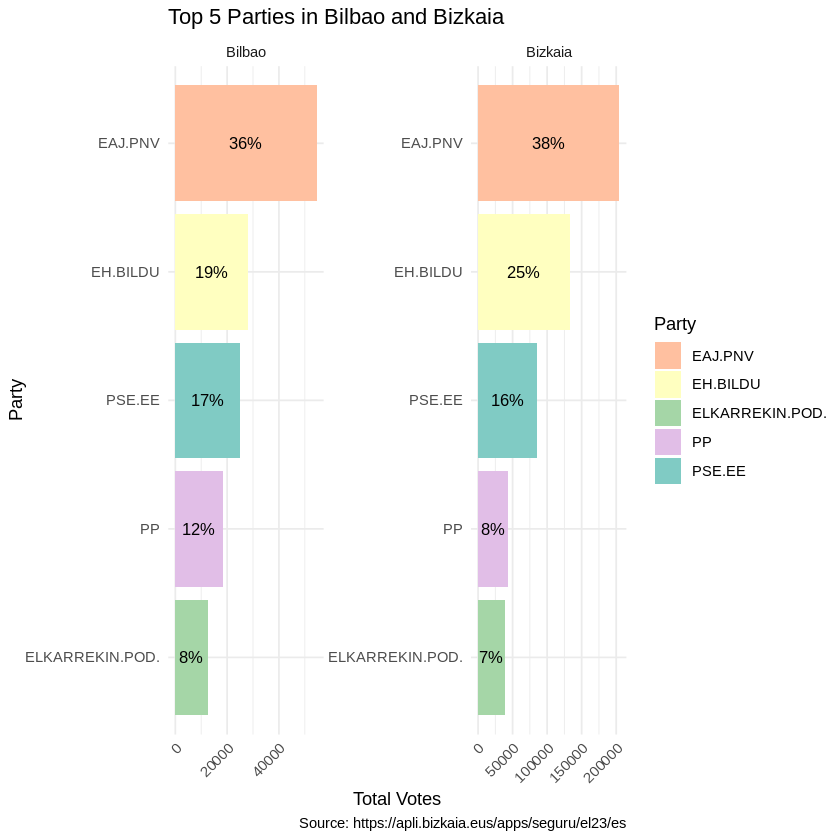

In [ ]:
#visualisation grouped bar chart

party_colors = c("EAJ.PNV" = "#FFC0A0",
                  "EH.BILDU" = "#FFFFC0",
                  "PSE.EE" = "#80CBC4",
                  "PP" = "#E1BEE7",
                  "ELKARREKIN.POD." = "#A5D6A7")

ggplot(combined_top_five, aes(x = reorder(PARTY, VOTES_IN_PERCENTAGE), y = VOTES, fill = PARTY)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(VOTES_IN_PERCENTAGE, "%")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.5) +
  labs(title = "Top 5 Parties in Bilbao and Bizkaia",
       x = "Party",
       y = "Total Votes",
       fill = "Party",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(~AREA, scales = "free") +
  scale_fill_manual(values = party_colors) +
  coord_flip()


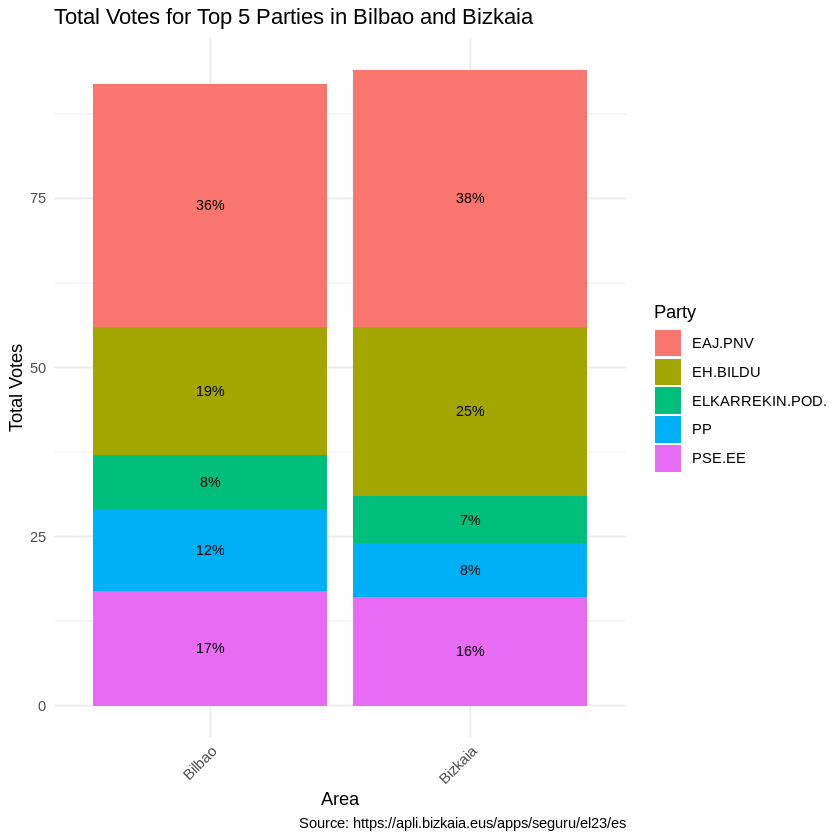

In [ ]:
#visualisation stacked bar chart

ggplot(combined_top_five, aes(x = reorder(AREA, VOTES_IN_PERCENTAGE), y = VOTES_IN_PERCENTAGE, fill = PARTY)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(VOTES_IN_PERCENTAGE, "%")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3) +
  labs(title = "Total Votes for Top 5 Parties in Bilbao and Bizkaia",
       x = "Area",
       y = "Total Votes",
       fill = "Party",
       caption = "Source: https://apli.bizkaia.eus/apps/seguru/el23/es") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


As we can see on both charts, showing really good the similarity between all voters and voters from Bilbao. The biggest different is with EH.BILDU party, which in Bilbao is 19% and in whole Bizakia 25%. The rest results are almost the same.

**Conlusions:**
During this task, I had learned not only how to properly visualise the data, but additionally the data cleaning and transforming. 